In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data_df = pd.read_csv('dataset/seattle-weather.csv')
data_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [15]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [16]:
data_df.shape

(1461, 6)

In [17]:
data_df['date'] = pd.to_datetime(data_df['date'], format='%Y-%m-%d')

In [18]:
data_df['date'].unique()

<DatetimeArray>
['2012-01-01 00:00:00', '2012-01-02 00:00:00', '2012-01-03 00:00:00',
 '2012-01-04 00:00:00', '2012-01-05 00:00:00', '2012-01-06 00:00:00',
 '2012-01-07 00:00:00', '2012-01-08 00:00:00', '2012-01-09 00:00:00',
 '2012-01-10 00:00:00',
 ...
 '2015-12-22 00:00:00', '2015-12-23 00:00:00', '2015-12-24 00:00:00',
 '2015-12-25 00:00:00', '2015-12-26 00:00:00', '2015-12-27 00:00:00',
 '2015-12-28 00:00:00', '2015-12-29 00:00:00', '2015-12-30 00:00:00',
 '2015-12-31 00:00:00']
Length: 1461, dtype: datetime64[ns]

In [20]:
data_df.set_index('date', inplace=True)
data_df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [21]:
data_df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [23]:
data_df.isnull().any()

precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

In [25]:
data_df.isnull().any().value_counts()

False    5
Name: count, dtype: int64

In [34]:
data_df.reset_index(level=0, inplace=True)

In [35]:
data_df['year'] = data_df['date'].dt.year
data_df['month'] = data_df['date'].dt.month
data_df['day'] = data_df['date'].dt.day

<Axes: xlabel='year', ylabel='count'>

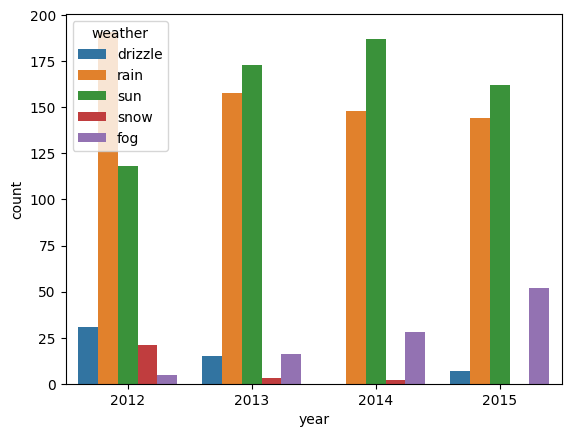

In [36]:
sns.countplot(data_df, x='year', hue='weather')

<Axes: xlabel='month', ylabel='count'>

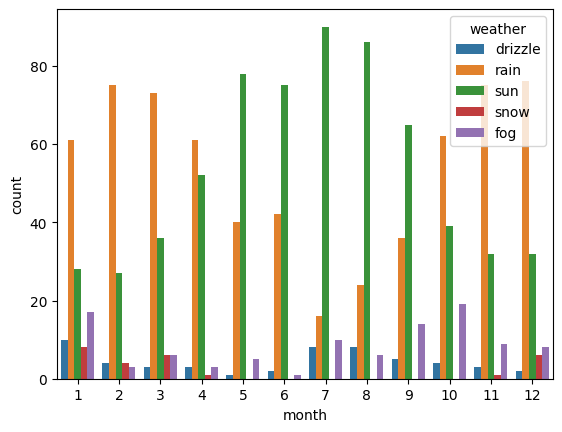

In [37]:
sns.countplot(data_df, x='month', hue='weather')

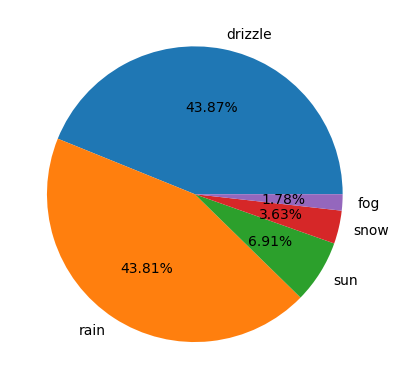

In [50]:
plt.pie(data_df['weather'].value_counts(), labels=data_df['weather'].unique(), autopct='%.2f%%');

<Axes: xlabel='weather', ylabel='Count'>

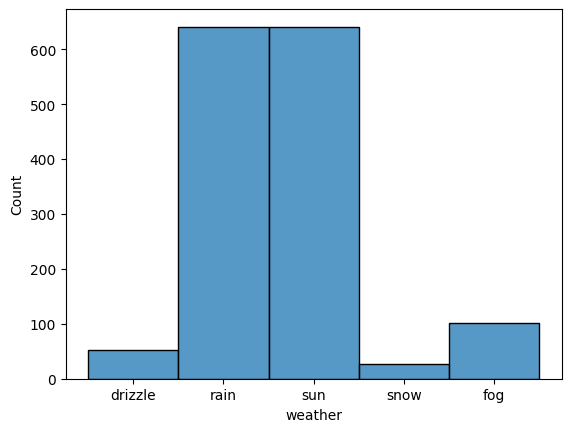

In [51]:
sns.histplot(data_df['weather'])

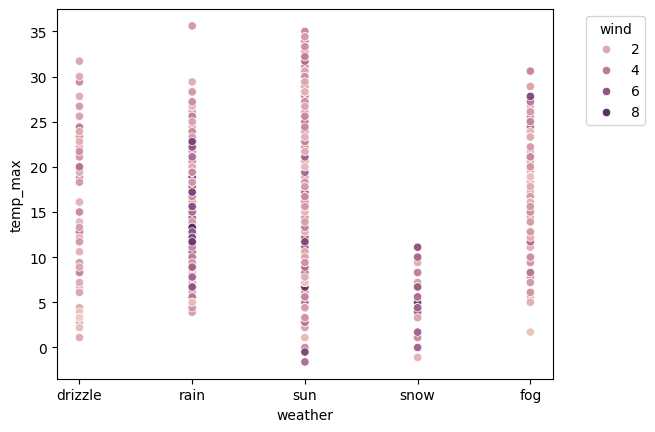

In [68]:
sns.scatterplot(data_df, x='weather', y='temp_max', hue='wind')
plt.legend(bbox_to_anchor=(1.2, 1), title = 'wind', loc='upper right')

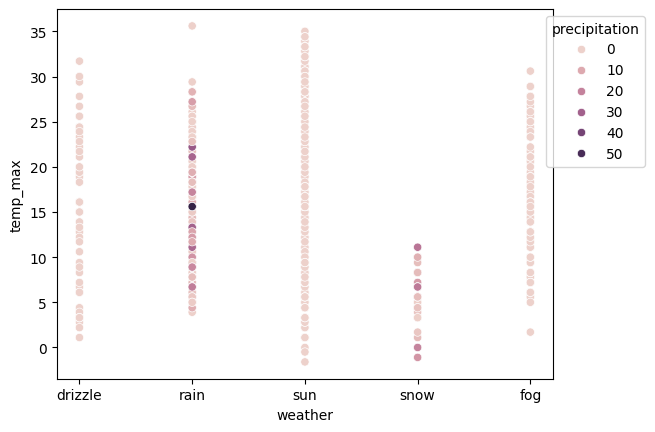

In [70]:
sns.scatterplot(data_df, x='weather', y='temp_max', hue='precipitation')
plt.legend(bbox_to_anchor=(1.2, 1), title = 'precipitation', loc='upper right')

In [58]:
num_feat = data_df.dtypes[data_df.dtypes != 'object'].index
num_feat = [i for i in num_feat if i != 'date']
num_feat

['precipitation', 'temp_max', 'temp_min', 'wind', 'year', 'month', 'day']

<Axes: >

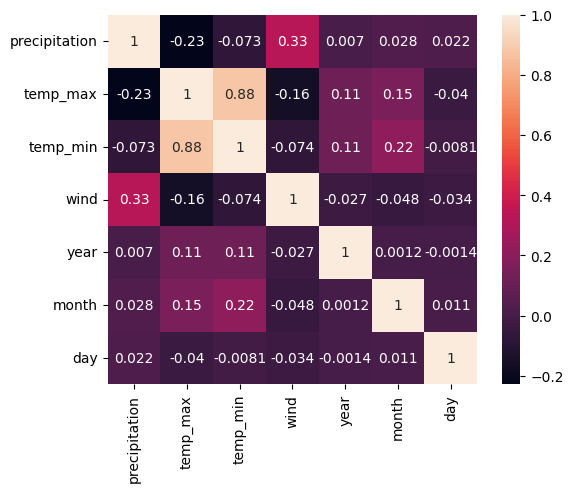

In [59]:
corr_mat = data_df[num_feat].corr()
sns.heatmap(corr_mat, annot=True, square=True)

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [74]:
X = data_df.drop(columns=['weather', 'date'])
y = data_df['weather']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [76]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 7), (293, 7), (1168,), (293,))

In [77]:
model_gnb = GaussianNB()

In [78]:
model_gnb.fit(X_train, y_train)

GaussianNB()

In [80]:
from sklearn.metrics import classification_report

In [82]:
model_predict = model_gnb.predict(X_test)
print(classification_report(model_predict, y_test))

              precision    recall  f1-score   support

     drizzle       0.14      0.20      0.17         5
         fog       0.12      0.50      0.20         4
        rain       0.93      1.00      0.97       127
        snow       1.00      0.67      0.80         9
         sun       0.96      0.83      0.89       148

    accuracy                           0.88       293
   macro avg       0.63      0.64      0.60       293
weighted avg       0.93      0.88      0.90       293

